In [1]:
# 1. Import necessary libraries.
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


In [2]:
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
df = pd.read_csv('/Users/maheshnukala/Desktop/IIIT/PartB/Week4Assignment/Required Files(To be shared with the learners)/sales_data_sample.csv',encoding="unicode_escape")

In [4]:
# 2. Display a sample of five rows of the data frame.
df.head(5)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
# 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.
df.shape

(2823, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [7]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [8]:
# 4. Check the percentage of missing values in each column of the data frame.
Total = df.isnull().sum().sort_values(ascending=False)
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
ADDRESSLINE2,2521,89.302161
STATE,1486,52.639036
TERRITORY,1074,38.044633
POSTALCODE,76,2.692171
ORDERNUMBER,0,0.000000
CUSTOMERNAME,0,0.000000
CONTACTFIRSTNAME,0,0.000000
CONTACTLASTNAME,0,0.000000
COUNTRY,0,0.000000
CITY,0,0.000000


In [9]:
# 5. Check if there are any duplicate rows.
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")

Duplicate Rows :


In [10]:
df['POSTALCODE'].value_counts()

28034      259
97562      205
10022      152
94217       89
50553       61
          ... 
4101        15
80686       14
WA1 1DP     12
B-6000       8
92561        3
Name: POSTALCODE, Length: 73, dtype: int64

In [11]:
df['TERRITORY'].value_counts()

EMEA     1407
APAC      221
Japan     121
Name: TERRITORY, dtype: int64

In [12]:
df['STATE'].value_counts()

CA               416
MA               190
NY               178
NSW               92
Victoria          78
PA                75
CT                61
BC                48
NH                34
Tokyo             32
NV                29
Isle of Wight     26
Quebec            22
NJ                21
Osaka             20
Queensland        15
Name: STATE, dtype: int64

In [13]:
# Mode Imputation
#6. Write a function that will impute missing values of the columns “STATE”, “POSTALCODE”,“TERRITORY” with its most occurring label.

df_mode = df.copy()
mode_imputer = SimpleImputer(strategy='most_frequent')
df_mode['STATE'] = mode_imputer.fit_transform(df_mode['STATE'].values.reshape(-1,1))

In [14]:
df_mode['STATE'].value_counts()

CA               1902
MA                190
NY                178
NSW                92
Victoria           78
PA                 75
CT                 61
BC                 48
NH                 34
Tokyo              32
NV                 29
Isle of Wight      26
Quebec             22
NJ                 21
Osaka              20
Queensland         15
Name: STATE, dtype: int64

In [15]:
df_mode['TERRITORY'] = mode_imputer.fit_transform(df_mode['TERRITORY'].values.reshape(-1,1))
df_mode['POSTALCODE'] = mode_imputer.fit_transform(df_mode['POSTALCODE'].values.reshape(-1,1))

In [16]:
df_mode['TERRITORY'].value_counts()

EMEA     2481
APAC      221
Japan     121
Name: TERRITORY, dtype: int64

In [17]:
df_mode['POSTALCODE'].value_counts()

28034      335
97562      205
10022      152
94217       89
50553       61
          ... 
4101        15
80686       14
WA1 1DP     12
B-6000       8
92561        3
Name: POSTALCODE, Length: 73, dtype: int64

In [18]:
# 7. Drop “ADDRESSLINE2”,”ORDERDATE”,”PHONE” column.
df_mode = df_mode.drop(['ADDRESSLINE2'], axis=1)
df_mode = df_mode.drop(['ORDERDATE'], axis=1)
df_mode = df_mode.drop(['PHONE'], axis=1)

In [19]:
df_mode.shape

(2823, 22)

In [20]:
df_mode['STATUS'].value_counts()

Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

In [21]:
# 8. Convert the labels of the STATUS column to 0 and 1. For Shipped assign value 1 and for all other labels (i.e. ‘Canceled’,’ Resolved’,’ On Hold’,’ In Process’, 'Disputed') assign 0. Note we will consider everything apart from Shipped as cancel (i.e. 0).
df_mode['STATUS'] = df_mode['STATUS'].replace('Shipped',1)
df_mode['STATUS'] = df_mode['STATUS'].replace('Cancelled',0)
df_mode['STATUS'] = df_mode['STATUS'].replace('Resolved',0)
df_mode['STATUS'] = df_mode['STATUS'].replace('On Hold',0)
df_mode['STATUS'] = df_mode['STATUS'].replace('In Process',0)
df_mode['STATUS'] = df_mode['STATUS'].replace('Disputed',0)

In [22]:
df_mode['STATUS'].value_counts()

1    2617
0     206
Name: STATUS, dtype: int64

In [23]:
# 9. Assign ‘STATUS’ column into a label variable and drop it from the original Dataframe. Convert the original dataframe to the dummy coded data.(Hint:-use pd.get_dummies()).#
label = df_mode['STATUS']

In [24]:
#df_mode = df_mode.drop(['STATUS'], axis=1)

In [25]:
df_mode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   STATUS            2823 non-null   int64  
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  ADDRESSLINE1      2823 non-null   object 
 14  CITY              2823 non-null   object 
 15  STATE             2823 non-null   object 
 16  POSTALCODE        2823 non-null   object 


In [26]:
df_dummy = pd.get_dummies(df_mode)

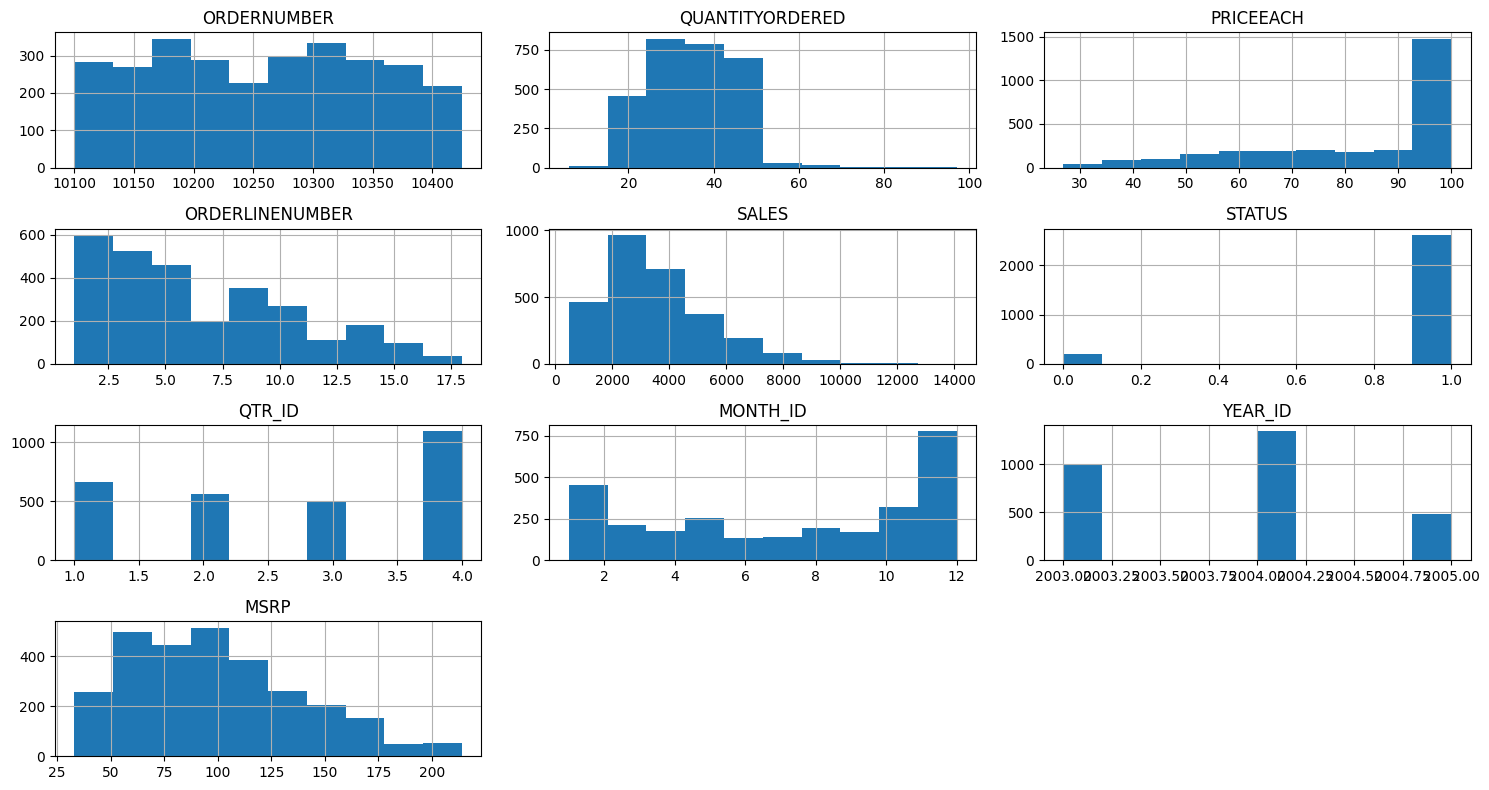

In [27]:
# for the independent variables, we plot the histogram to check the distribution of the variables
# the 'hist()' considers the numeric variables and returns the histogram of each variable
df_mode.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

In [28]:
df_mode.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
STATUS                int64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
ADDRESSLINE1         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [29]:
df_mode.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,1,1,2,2003,Motorcycles,...,Land of Toys Inc.,897 Long Airport Avenue,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,1,2,5,2003,Motorcycles,...,Reims Collectables,59 rue de l'Abbaye,Reims,CA,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,1,3,7,2003,Motorcycles,...,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,CA,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,1,3,8,2003,Motorcycles,...,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,1,4,10,2003,Motorcycles,...,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,CA,28034,USA,EMEA,Brown,Julie,Medium


In [30]:
df_mode['PRODUCTCODE'].value_counts()

S18_3232    52
S10_1949    28
S24_1444    28
S10_4962    28
S24_2840    28
            ..
S18_1749    22
S24_2887    22
S24_3969    22
S18_4409    22
S18_4933    22
Name: PRODUCTCODE, Length: 109, dtype: int64

In [31]:
df_mode = df_mode.replace('Classic Cars','1').replace('Vintage Cars','2').replace('Motorcycles','3').replace('Planes','4').replace('Trucks and Buses','5').replace('Ships','6').replace('Trains','7')

In [32]:
df_mode['DEALSIZE'].value_counts()

Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

In [33]:
df_mode = df_mode.replace('Medium','777').replace('Small','888').replace('Large','999')

In [34]:
df_mode = df_mode.replace('EMEA','1555').replace('APAC','1666').replace('1215','1215')

In [35]:
df_mode = df_mode.replace('USA','1111').replace('Spain','2222').replace('France','3333').replace('Australia','4444').replace('UK','5555').replace('Italy','6666').replace('Finland','7777').replace('Norway','8888').replace('Singapore','9999').replace('Canada','0000').replace('Denmark','1211').replace('Germany','1212').replace('Sweden','1213').replace('Austria','1214').replace('Japan','1215').replace('Belgium','1216').replace('Switzerland','1217').replace('Philippines','1218').replace('Ireland','1219')

In [36]:
df_mode = df_mode.replace('CA','11').replace('MA','22').replace('NY','33').replace('NSW','44').replace('Victoria','55').replace('PA','66').replace('CT','77').replace('BC','88').replace('NH','99').replace('Tokyo','111').replace('NV','222').replace('Isle of Wight','333').replace('Quebec','444').replace('NJ','555').replace('Osaka','666').replace('Queensland','777')

In [37]:
df_mode.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,CUSTOMERNAME,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,1,1,2,2003,3,...,Land of Toys Inc.,897 Long Airport Avenue,NYC,33,10022,1111,1555,Yu,Kwai,888
1,10121,34,81.35,5,2765.90,1,2,5,2003,3,...,Reims Collectables,59 rue de l'Abbaye,Reims,11,51100,3333,1555,Henriot,Paul,888
2,10134,41,94.74,2,3884.34,1,3,7,2003,3,...,Lyon Souveniers,27 rue du Colonel Pierre Avia,Paris,11,75508,3333,1555,Da Cunha,Daniel,777
3,10145,45,83.26,6,3746.70,1,3,8,2003,3,...,Toys4GrownUps.com,78934 Hillside Dr.,Pasadena,11,90003,1111,1555,Young,Julie,777
4,10159,49,100.00,14,5205.27,1,4,10,2003,3,...,Corporate Gift Ideas Co.,7734 Strong St.,San Francisco,11,28034,1111,1555,Brown,Julie,777


In [38]:
df_mode['PRODUCTLINE']=df_mode['PRODUCTLINE'].astype(int)

In [39]:
df_mode['STATE']=df_mode['STATE'].astype(int)
#df_mode['POSTALCODE']=df_mode['POSTALCODE'].astype(int)
df_mode['COUNTRY']=df_mode['COUNTRY'].astype(int)
df_mode['TERRITORY']=df_mode['TERRITORY'].astype(int)
df_mode['DEALSIZE']=df_mode['DEALSIZE'].astype(int)

In [40]:
df_mode = df_mode.drop(['CONTACTFIRSTNAME'], axis=1)
df_mode = df_mode.drop(['CONTACTLASTNAME'], axis=1)
df_mode = df_mode.drop(['CITY'], axis=1)
df_mode = df_mode.drop(['ADDRESSLINE1'], axis=1)
df_mode = df_mode.drop(['CUSTOMERNAME'], axis=1)


df_mode = df_mode.drop(['PRODUCTCODE'], axis=1)
df_mode = df_mode.drop(['POSTALCODE'], axis=1)

In [41]:
df_mode.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,STATE,COUNTRY,TERRITORY,DEALSIZE
0,10107,30,95.70,2,2871.00,1,1,2,2003,3,95,33,1111,1555,888
1,10121,34,81.35,5,2765.90,1,2,5,2003,3,95,11,3333,1555,888
2,10134,41,94.74,2,3884.34,1,3,7,2003,3,95,11,3333,1555,777
3,10145,45,83.26,6,3746.70,1,3,8,2003,3,95,11,1111,1555,777
4,10159,49,100.00,14,5205.27,1,4,10,2003,3,95,11,1111,1555,777


In [42]:
df_mode.dtypes

ORDERNUMBER          int64
QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
STATUS               int64
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE          int64
MSRP                 int64
STATE                int64
COUNTRY              int64
TERRITORY            int64
DEALSIZE             int64
dtype: object

In [43]:
# 10. Use StandardScaler to scale the data.

sales_std = StandardScaler().fit_transform(df_mode.drop('STATUS', axis = 1))
df_mode_std = pd.DataFrame(sales_std, columns = df_mode.drop('STATUS', axis = 1).columns)
print('Mean: \n', round(df_mode_std.mean()))
print('\n')
print('Standard Deviation: \n', round(df_mode_std.std()))

Mean: 
 ORDERNUMBER       -0.0
QUANTITYORDERED    0.0
PRICEEACH         -0.0
ORDERLINENUMBER    0.0
SALES              0.0
QTR_ID             0.0
MONTH_ID          -0.0
YEAR_ID           -0.0
PRODUCTLINE        0.0
MSRP               0.0
STATE              0.0
COUNTRY            0.0
TERRITORY         -0.0
DEALSIZE           0.0
dtype: float64


Standard Deviation: 
 ORDERNUMBER        1.0
QUANTITYORDERED    1.0
PRICEEACH          1.0
ORDERLINENUMBER    1.0
SALES              1.0
QTR_ID             1.0
MONTH_ID           1.0
YEAR_ID            1.0
PRODUCTLINE        1.0
MSRP               1.0
STATE              1.0
COUNTRY            1.0
TERRITORY          1.0
DEALSIZE           1.0
dtype: float64


In [44]:
df_mode_std.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,STATE,COUNTRY,TERRITORY,DEALSIZE
0,-1.647947,-0.522891,0.596978,-1.057059,-0.370825,-1.427039,-1.392909,-1.16517,0.122344,-0.142246,-0.096876,-0.699153,0.076695,0.727487
1,-1.495888,-0.112201,-0.114450,-0.347015,-0.427897,-0.596243,-0.572337,-1.16517,0.122344,-0.142246,-0.308445,0.195620,0.076695,0.727487
2,-1.354689,0.606505,0.549384,-1.057059,0.179443,0.234553,-0.025289,-1.16517,0.122344,-0.142246,-0.308445,0.195620,0.076695,-0.946267
3,-1.235214,1.017195,-0.019759,-0.110334,0.104701,0.234553,0.248235,-1.16517,0.122344,-0.142246,-0.308445,-0.699153,0.076695,-0.946267
4,-1.083154,1.427884,0.810158,1.783116,0.896740,1.065350,0.795284,-1.16517,0.122344,-0.142246,-0.308445,-0.699153,0.076695,-0.946267


In [45]:
df_mode_std.T.head()

,0,1,2,3,4,5,6,7,8,9,...,2813,2814,2815,2816,2817,2818,2819,2820,2821,2822
ORDERNUMBER,-1.647947,-1.495888,-1.354689,-1.235214,-1.083154,-0.985402,-0.855065,-0.768174,-0.626976,-0.518362,...,0.372273,0.513471,0.611224,0.741561,0.850175,0.991373,1.241185,1.382383,1.501859,1.686503
QUANTITYORDERED,-0.522891,-0.112201,0.606505,1.017195,1.427884,0.093143,-0.625563,1.325212,-1.344270,0.606505,...,-0.317546,-0.009529,0.503833,0.195816,0.709178,-1.549615,-0.625563,0.811850,-0.112201,1.222540
PRICEEACH,0.596978,-0.114450,0.549384,-0.019759,0.810158,0.644571,0.122527,0.810158,0.739263,0.810158,...,-1.169942,-1.197209,-1.386592,0.152769,0.669360,0.810158,0.810158,0.810158,-1.061864,-0.899252
ORDERLINENUMBER,-1.057059,-0.347015,-1.057059,-0.110334,1.783116,-1.293740,0.599710,-1.293740,-1.057059,1.783116,...,-1.293740,-0.110334,-0.347015,-0.583696,-0.347015,2.019797,-1.293740,-0.583696,-1.293740,0.599710
SALES,-0.370825,-0.427897,0.179443,0.104701,0.896740,-0.040254,-0.573498,1.063475,-0.752278,0.626949,...,-0.886199,-0.798810,-0.720207,-0.187077,0.286082,-0.711084,0.230579,1.012024,-0.780722,-0.257637


In [46]:
covariance_mat = np.cov(df_mode_std.T)
covariance_mat[0:5]

array([[ 1.00035436,  0.06556638, -0.00293558, -0.05556975,  0.03993343,
        -0.05140158, -0.03973728,  0.90491612,  0.00823766, -0.01028328,
         0.03111645, -0.06900499,  0.09928725,  0.01906003],
       [ 0.06556638,  1.00035436,  0.005566  , -0.01840317,  0.55162159,
        -0.03533598, -0.03906218,  0.06955952,  0.00645069,  0.0178873 ,
         0.01320455, -0.03976133, -0.02742332, -0.12460056],
       [-0.00293558,  0.005566  ,  1.00035436, -0.02097199,  0.65807404,
         0.00871535,  0.00515379, -0.00594057, -0.04237907,  0.67086259,
         0.00324823, -0.00996715, -0.00694137, -0.40175597],
       [-0.05556975, -0.01840317, -0.02097199,  1.00035436, -0.05842108,
         0.04072996,  0.03402827, -0.05738739,  0.03056725, -0.02107493,
        -0.04230632,  0.05318936, -0.02619048, -0.01530237],
       [ 0.03993343,  0.55162159,  0.65807404, -0.05842108,  1.00035436,
        -0.00679849, -0.00960859,  0.03565952, -0.13328508,  0.63546454,
        -0.00480825, -0.01

In [47]:
covariance_mat.shape

(14, 14)

In [48]:
eigenvalue, eigenvector = np.linalg.eig(covariance_mat)
print('Eigenvalues: \n',eigenvalue,"\n")

print('Eigenvectors: \n',eigenvector,'\n')

Eigenvalues: 
 [2.55555568 2.4817481  1.55809455 0.01248801 0.02240994 0.09141578
 0.27939083 1.21783444 1.12458517 1.08559857 1.0025928  0.93081951
 0.82034658 0.82208104] 

Eigenvectors: 
 [[-1.26296127e-01 -3.53717624e-01  6.16839686e-01  5.88807159e-01
   2.85457094e-01 -5.02651934e-04 -3.87277793e-03  2.78675865e-02
  -7.57817859e-02  7.74217092e-02 -1.60829272e-01  6.74833494e-02
  -8.33976945e-02 -1.89267989e-02]
 [-2.39130823e-01 -4.18416892e-03  7.12588931e-02 -7.24882488e-03
   9.16112260e-03 -4.51773463e-01 -1.10239517e-01 -5.11182812e-01
   6.48017167e-01 -2.35928221e-02  4.10911649e-02 -5.43452988e-02
   3.19588389e-02 -1.84061480e-01]
 [-5.02474081e-01  1.78248713e-01 -4.17315358e-02 -5.63705441e-03
   1.34831635e-02 -4.73242544e-01  5.85307513e-01  1.29693825e-01
  -2.58261163e-01  1.80487711e-01  5.20883763e-02  6.16990784e-02
   3.88193274e-02  1.52074541e-01]
 [ 5.57478097e-02  5.19305289e-02 -6.40928924e-02  3.53088772e-03
   6.57145843e-03  1.88776538e-02  1.9080378

In [49]:
list_eigenvalue = eigenvalue.tolist()
list_eigenvalue.sort(reverse = True)
print(list_eigenvalue)

[2.5555556836404087, 2.4817481031597985, 1.5580945472233165, 1.217834438724281, 1.1245851710776176, 1.0855985731814006, 1.0025927985405492, 0.9308195119521274, 0.8220810445370744, 0.8203465814099536, 0.2793908339396608, 0.09141577508674302, 0.022409944043373882, 0.012488014036498702]


In [50]:
percent_var = []
for i in list_eigenvalue:
    variation = i/sum(list_eigenvalue)*100
    percent_var.append(variation)
    
percent_var

[18.247503009041115,
 17.72049275622931,
 11.125304418461102,
 8.695736010525579,
 8.029905755733605,
 7.75152870178106,
 7.158840335715369,
 6.646355606317752,
 5.86992740165888,
 5.85754276792391,
 1.9949418890180717,
 0.6527385185334463,
 0.16001432642680294,
 0.08916850263397429]

In [51]:
eig_vec_4 = eigenvector[:,0:2]
eig_vec_4

array([[-0.12629613, -0.35371762],
       [-0.23913082, -0.00418417],
       [-0.50247408,  0.17824871],
       [ 0.05574781,  0.05193053],
       [-0.53847027,  0.13993167],
       [ 0.14441105,  0.50026782],
       [ 0.14576411,  0.49704647],
       [-0.16937034, -0.51750931],
       [ 0.12514726, -0.070377  ],
       [-0.48345499,  0.17745828],
       [-0.02308753, -0.0786715 ],
       [ 0.0337219 ,  0.04931936],
       [ 0.01280104, -0.01961994],
       [ 0.24354631, -0.10112468]])

In [52]:
new_data = np.dot(df_mode_std, eig_vec_4)

# create the dataframe using the 'DataFrame()'
# pass the required column names to the parameter 'columns'
df_pca = pd.DataFrame(new_data, columns = ['PC1', 'PC2'])

# head() to display top five rows
df_pca.head()

,PC1,PC2
0,0.203080,-0.354318
1,0.788100,0.376510
2,-0.309695,1.346786
3,-0.034293,1.331888
4,-0.689935,2.321003


In [53]:
df_pca.shape

(2823, 2)

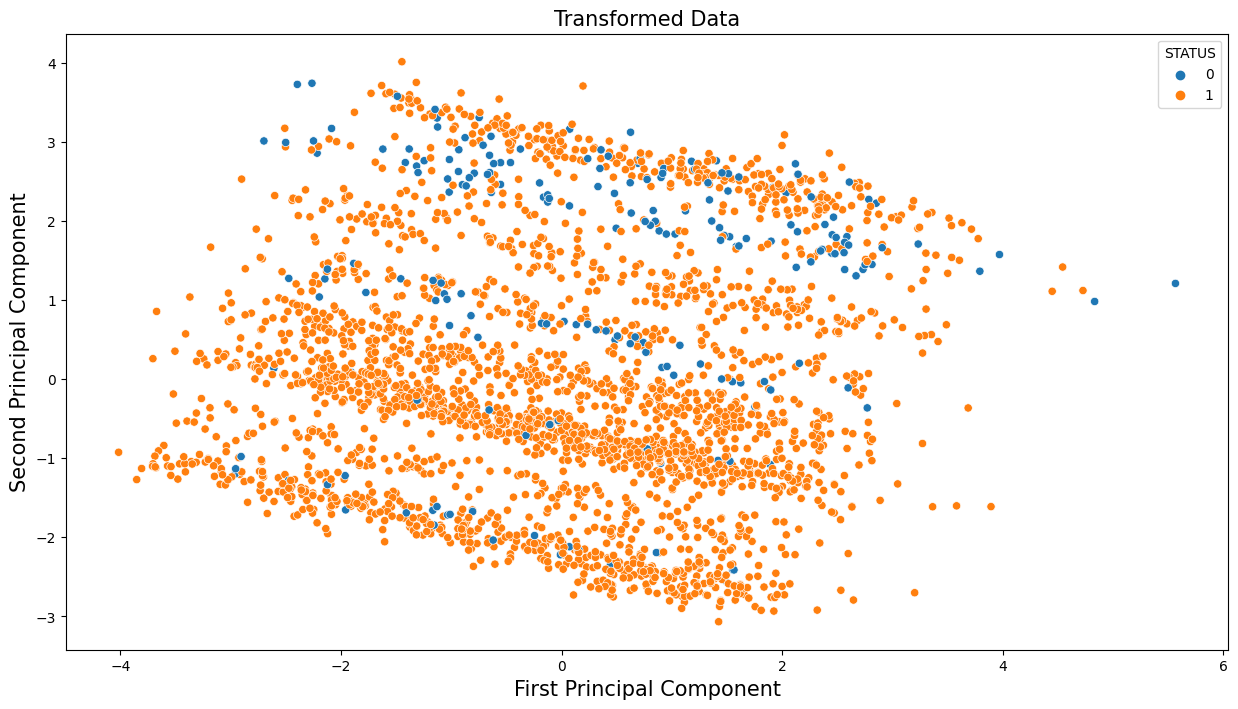

In [54]:
# 1. Take the help of PCA to reduce the data to 2 dimensions. Use n_components=2
#2. Take the first and second principal components and plot a scatter plot with the labels. 
pca = PCA(n_components = 2, random_state = 10)  

pca_2 = pca.fit_transform(df_mode_std)

df_pca_2 = pd.DataFrame(pca_2, columns = ['PC1', 'PC2'])

sns.scatterplot(x = 'PC1', y = 'PC2', data = df_pca_2, hue = label)
#sns.lmplot(x='PC1', y='PC2', data=df_pca_2)

plt.title('Transformed Data', fontsize = 15)
plt.xlabel('First Principal Component', fontsize = 15)
plt.ylabel('Second Principal Component', fontsize = 15)

# display the plot
plt.show()

3. Write the intuitions about the scatter plot.


In Scatter Plot maximum variation ( shipped as status) in the data along the first principal component.

In [55]:
y = df_mode['STATUS']

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df_mode_std, y, test_size = 0.3, random_state = 10)

# check the shape of the train and test sets
print('X_train_raw:', X_train_raw.shape)
print('y_train:', y_train.shape)
print('X_test_raw:', X_test_raw.shape)
print('y_test:', y_test.shape)

X_train_raw: (1976, 14)
y_train: (1976,)
X_test_raw: (847, 14)
y_test: (847,)


In [66]:
pca = PCA(n_components = 10, random_state = 10)  

X_train_pca = pca.fit_transform(X_train_raw)
X_test_pca = pca.transform(X_test_raw)

print('Train set:', X_train_pca.shape)
print('Test set:', X_test_pca.shape)

Train set: (1976, 10)
Test set: (847, 10)


In [67]:
# define a function to perform random forest algorithm and return the accuracy on the test set
# pass the train and test sets as the function parameters
def randomforest_model_run(X_train, X_test, y_train, y_test):
    
    # create a random forest classifier object
    # pass the random state to obtain the reproducible results
    rf_clf = RandomForestClassifier(random_state=1)
    
    # fit the random forest model on the train data
    rf_clf.fit(X_train, y_train)
    
    # predict the output values for test set
    y_pred = rf_clf.predict(X_test)
    
    # calculate accuracy for test set
    test_acc = accuracy_score(y_test, y_pred)
    
    # return the test accuracy 
    return print('Test Accuracy:', test_acc)

In [68]:
X_train_raw.shape, X_train_pca.shape

((1976, 14), (1976, 10))

In [69]:
randomforest_model_run(X_train_raw, X_test_raw, y_train, y_test)

Test Accuracy: 0.9858323494687131


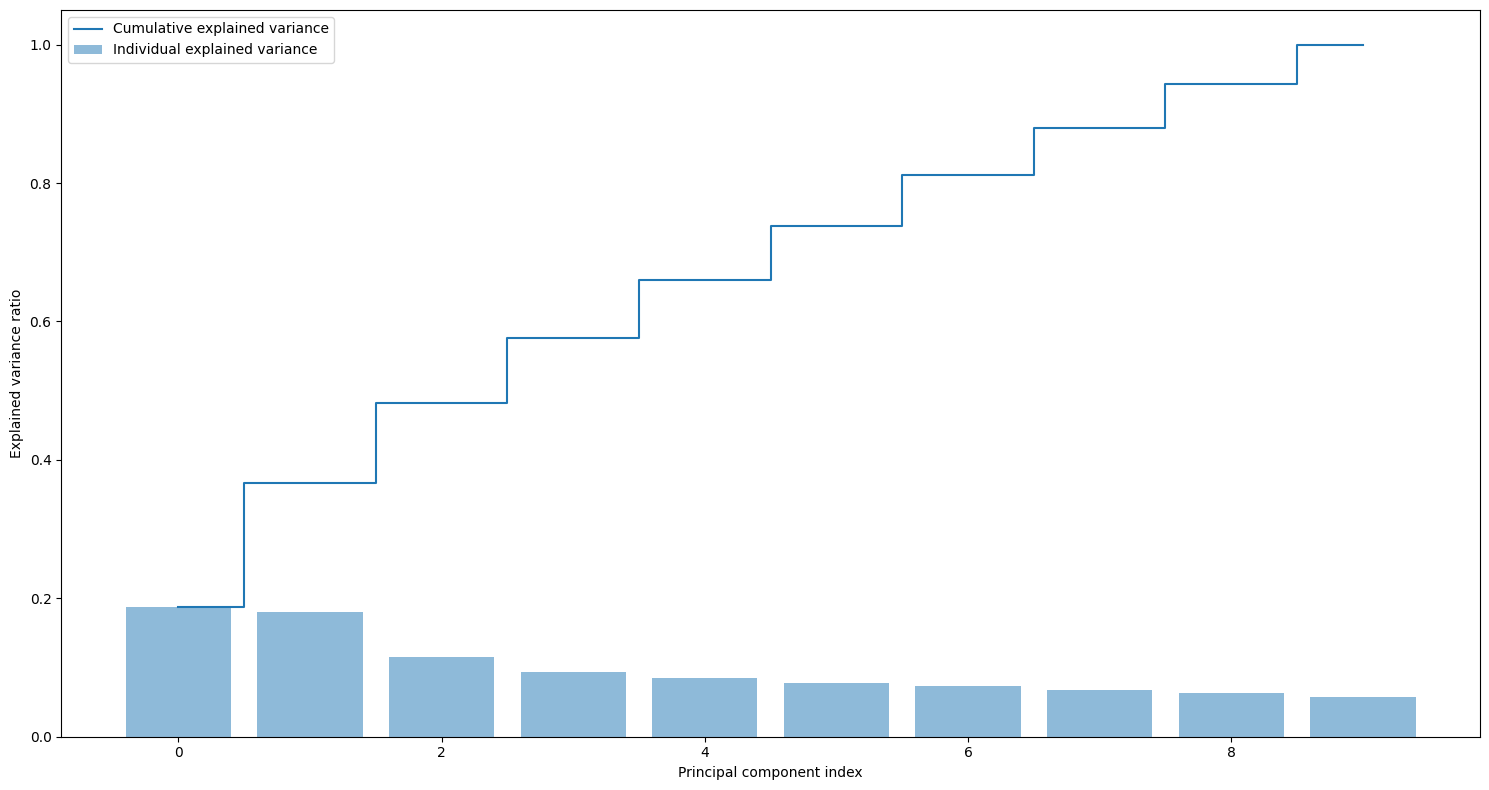

In [70]:
# 1. Fit the PCA model on the data and plot a graph between n_components and cumulative explained variance. 
X_train_pca = pca.fit_transform(X_train_pca)


exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

2. In how many components we are getting approximately 90% of explained Variance.

As per above graph for ncomponent as 10 we are getting 3 components as 90% of explained variance

In [62]:
# 1. Split the dataset into two parts (i.e. 80% train and 20% test) using random_state=42. (
y = df_mode['STATUS']

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(df_mode_std, y, test_size = 0.2, random_state = 42)

# check the shape of the train and test sets
print('X_train_raw:', X_train_lda.shape)
print('y_train:', y_train_lda.shape)
print('X_test_raw:', X_test_lda.shape)
print('y_test:', y_test_lda.shape)

X_train_raw: (2258, 14)
y_train: (2258,)
X_test_raw: (565, 14)
y_test: (565,)


In [63]:
# 2. Train a Linear Discriminant Analysis(LDA) model on the train data. Do fit_transform on the train data and only transform on the test data. Use n_components=1.
lda = LDA(n_components = 1)

# fit and transform the LDA on train data using the 'fit_transform()' 
X_train_lda = lda.fit_transform(X_train_lda, y_train_lda)

# transform the test data 
X_test_lda = lda.transform(X_test_lda)

In [64]:
X_train_lda.shape, X_test_lda.shape

((2258, 1), (565, 1))

In [65]:
# 3. Train a RandomForest classifier model on the transformed train and test data. Print the accuracy score.
%time
randomforest_model_run(X_train_lda, X_test_lda, y_train_lda, y_test_lda)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 2.15 µs
Test Accuracy: 0.8849557522123894
